In [1]:
import gcp.bigquery as bq
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%sql --module control
SELECT
  float(tblLpPrd.gaProductAddsToCart / tblLp.gaEntrances) as CartToEntrance,
  float(tblLpPrd.gaUniquePurchases / tblLp.gaEntrances) as CVR,
  float((float(tblLpPrd.gaProductAddsToCart / tblLp.gaEntrances) - 0) / (0.35294117647058826 - 0)) as nomalizedCartToEnt,
  tblLpPrd.gaProductAddsToCart as addingCart,
  tblLpPrd.gaUniquePurchases as purchases,
  tblLp.gaEntrances as entrances,
  tblLpPrd.gaLandingPagePath,
  tblLpPrd.gaProductName,
  tblLpPrd.gaProductSKU,
FROM
  [98177472.lp_and_products] AS tblLpPrd
JOIN (
  SELECT
    gaLandingPagePath,
    gaDate,
    gaEntrances
  FROM
    [98177472.landing_pages]
  WHERE
--    (REGEXP_MATCH(gaDate, r'20151[0-1]{1}.*') 
--      or REGEXP_MATCH(gaDate, r'2015120[1-9]{1}') 
--      or REGEXP_MATCH(gaDate, r'2015121[0-5]{1}'))
--    and 
    REGEXP_MATCH(gaLandingPagePath, r'^/items\/') is not true and REGEXP_MATCH(gaLandingPagePath, r'^/category\/') is not true
) AS tblLp
ON
  tblLpPrd.gaLandingPagePath == tblLp.gaLandingPagePath
  AND tblLpPrd.gaDate == tblLp.gaDate
--WHERE 
--  tblLpPrd.gaUniquePurchases > 0
ORDER BY
  CartToEntrance DESC

In [3]:
%%sql --module controlCategory
SELECT
  float(tblLpPrd.gaProductAddsToCart / tblLp.gaEntrances) as CartToEntrance,
  float(tblLpPrd.gaUniquePurchases / tblLp.gaEntrances) as CVR,
  float((float(tblLpPrd.gaProductAddsToCart / tblLp.gaEntrances) - 0) / (0.35294117647058826 - 0)) as nomalizedCartToEnt,
  tblLpPrd.gaProductAddsToCart as addingCart,
  tblLpPrd.gaUniquePurchases as purchases,
  tblLp.gaEntrances as entrances,
  tblLpPrd.gaLandingPagePath,
  tblLpPrd.gaProductName,
  tblLpPrd.gaProductSKU,
FROM
  [98177472.lp_and_products] AS tblLpPrd
JOIN (
  SELECT
    gaLandingPagePath,
    gaDate,
    gaEntrances
  FROM
    [98177472.landing_pages]
  WHERE
--    (REGEXP_MATCH(gaDate, r'20151[0-1]{1}.*') 
--      or REGEXP_MATCH(gaDate, r'2015120[1-9]{1}') 
--      or REGEXP_MATCH(gaDate, r'2015121[0-5]{1}'))
--    and 
    REGEXP_MATCH(gaLandingPagePath, r'^/category\/')
) AS tblLp
ON
  tblLpPrd.gaLandingPagePath == tblLp.gaLandingPagePath
  AND tblLpPrd.gaDate == tblLp.gaDate
--WHERE 
--  tblLpPrd.gaUniquePurchases > 0
ORDER BY
  CartToEntrance DESC

In [4]:
%%sql --module controlItem
SELECT
  float(tblLpPrd.gaProductAddsToCart / tblLp.gaEntrances) as CartToEntrance,
  float(tblLpPrd.gaUniquePurchases / tblLp.gaEntrances) as CVR,
  float((float(tblLpPrd.gaProductAddsToCart / tblLp.gaEntrances) - 0) / (0.35294117647058826 - 0)) as nomalizedCartToEnt,
  tblLpPrd.gaProductAddsToCart as addingCart,
  tblLpPrd.gaUniquePurchases as purchases,
  tblLp.gaEntrances as entrances,
  tblLpPrd.gaLandingPagePath,
  tblLpPrd.gaProductName,
  tblLpPrd.gaProductSKU,
FROM
  [98177472.lp_and_products] AS tblLpPrd
JOIN (
  SELECT
    gaLandingPagePath,
    gaDate,
    gaEntrances
  FROM
    [98177472.landing_pages]
  WHERE
--    (REGEXP_MATCH(gaDate, r'20151[0-1]{1}.*') 
--      or REGEXP_MATCH(gaDate, r'2015120[1-9]{1}') 
--      or REGEXP_MATCH(gaDate, r'2015121[0-5]{1}'))
--    and 
    REGEXP_MATCH(gaLandingPagePath, r'^/items\/')
) AS tblLp
ON
  tblLpPrd.gaLandingPagePath == tblLp.gaLandingPagePath
  AND tblLpPrd.gaDate == tblLp.gaDate
--WHERE 
--  tblLpPrd.gaUniquePurchases > 0
ORDER BY
  CartToEntrance DESC

In [5]:
%%sql --module ptnA
SELECT
  float(tblLpPrd.gaProductAddsToCart / tblLp.gaEntrances) as CartToEntrance,
  float(tblLpPrd.gaUniquePurchases / tblLp.gaEntrances) as CVR,
  float((float(tblLpPrd.gaProductAddsToCart / tblLp.gaEntrances) - 0) / (0.35294117647058826 - 0)) as nomalizedCartToEnt,
  tblLpPrd.gaProductAddsToCart as addingCart,
  tblLpPrd.gaUniquePurchases as purchases,
  tblLp.gaEntrances as entrances,
  tblLpPrd.gaLandingPagePath,
  tblLpPrd.gaProductName,
  tblLpPrd.gaProductSKU,
FROM
  [98177472.lp_and_products] AS tblLpPrd
JOIN (
  SELECT
    gaLandingPagePath,
    gaDate,
    gaEntrances
  FROM
    [98177472.landing_pages]
  WHERE
--    (REGEXP_MATCH(gaDate, r'2015121[6-9]{1}') 
--      or REGEXP_MATCH(gaDate, r'201512[2-3]{1}[0-9]{1}') 
--      or REGEXP_MATCH(gaDate, r'2016.*'))
--    and 
    REGEXP_MATCH(gaLandingPagePath, r'^/category\/')
) AS tblLp
ON
  tblLpPrd.gaLandingPagePath == tblLp.gaLandingPagePath
  AND tblLpPrd.gaDate == tblLp.gaDate
--WHERE 
--  tblLpPrd.gaUniquePurchases > 0
ORDER BY
  CartToEntrance DESC

In [6]:
%%sql --module ptnB
SELECT
  float(tblLpPrd.gaProductAddsToCart / tblLp.gaEntrances) as CartToEntrance,
  float(tblLpPrd.gaUniquePurchases / tblLp.gaEntrances) as CVR,
  float((float(tblLpPrd.gaProductAddsToCart / tblLp.gaEntrances) - 0) / (0.35294117647058826 - 0)) as nomalizedCartToEnt,
  tblLpPrd.gaProductAddsToCart as addingCart,
  tblLpPrd.gaUniquePurchases as purchases,
  tblLp.gaEntrances as entrances,
  tblLpPrd.gaLandingPagePath,
  tblLpPrd.gaProductName,
  tblLpPrd.gaProductSKU,
FROM
  [98177472.lp_and_products] AS tblLpPrd
JOIN (
  SELECT
    gaLandingPagePath,
    gaDate,
    gaEntrances
  FROM
    [98177472.landing_pages]
  WHERE
--    (REGEXP_MATCH(gaDate, r'2015121[6-9]{1}') 
--      or REGEXP_MATCH(gaDate, r'201512[2-3]{1}[0-9]{1}') 
--      or REGEXP_MATCH(gaDate, r'2016.*'))
--    and 
    REGEXP_MATCH(gaLandingPagePath, r'^/items\/')
) AS tblLp
ON
  tblLpPrd.gaLandingPagePath == tblLp.gaLandingPagePath
  AND tblLpPrd.gaDate == tblLp.gaDate
--WHERE 
--  tblLpPrd.gaUniquePurchases > 0
ORDER BY
  CartToEntrance DESC

In [7]:
dfcontrol = bq.Query(control).to_dataframe()
dfcontrolCategory = bq.Query(controlCategory).to_dataframe()
dfcontrolItem = bq.Query(controlItem).to_dataframe()
dfptnA = bq.Query(ptnA).to_dataframe()
dfptnB = bq.Query(ptnB).to_dataframe()
dfcontrol.head(5)
#dfptnA.head(5)
#dfptnB.head(5)

,CartToEntrance,CVR,nomalizedCartToEnt,addingCart,purchases,entrances,tblLpPrd_gaLandingPagePath,tblLpPrd_gaProductName,tblLpPrd_gaProductSKU
0,0.207547,0.0000,0.588050,11,0,53,/store/index.html,アーチャーリッジウィメンズベスト,PL1079
1,0.150000,0.0500,0.425000,3,1,20,/topics/feature/015459/index.html,キャッスルロック15L バックパック,PU9708
2,0.142857,0.0000,0.404762,2,0,14,/s/featureitems/blue_blue/index.html,パーセルマウンテンインターチェンジジャケット ※BLUE BLUE別注モデル,PM5978
3,0.133333,0.0000,0.377778,4,0,30,/s/store/kanagawa/index.html,スロットキャニオンパンツ,PM4642
4,0.125000,0.0625,0.354167,2,1,16,/topics/feature/015263/index.html,バウンティフルティンバーメッセンジャー,PU8917


In [8]:
dataTable = pd.DataFrame(
  columns=["nomalizedCartToEnt", "UPnCTE", "CartToEntrance", "UpCTE", "p-CTE", "CVR", "UpCVR", "p-CVR"])
print(dataTable)
print("--- mean ---")
print(dfcontrol["nomalizedCartToEnt"].mean())
print(dfcontrolCategory["nomalizedCartToEnt"].mean())
print(dfptnA["nomalizedCartToEnt"].mean())
print(dfcontrolItem["nomalizedCartToEnt"].mean())
print(dfptnB["nomalizedCartToEnt"].mean())
control = pd.DataFrame(
  [[dfcontrol["nomalizedCartToEnt"].mean(), 0, dfcontrol["CartToEntrance"].mean(), 0, 0, dfcontrol["CVR"].mean(), 0, 0]]
)
control.columns=["nomalizedCartToEnt", "UPnCTE", "CartToEntrance", "UpCTE", "p-CTE", "CVR", "UpCVR", "p-CVR"]
control.index=["control"]
controlCategory = pd.DataFrame(
  [[dfcontrolCategory["nomalizedCartToEnt"].mean(), 0, 
    dfcontrolCategory["CartToEntrance"].mean(), 0, 0,
    dfcontrolCategory["CVR"].mean(), 0, 0]]
)
controlCategory.columns=["nomalizedCartToEnt", "UPnCTE", "CartToEntrance", "UpCTE", "p-CTE", "CVR", "UpCVR", "p-CVR"]
controlCategory.index=["controlCategory"]
ptnACategory = pd.DataFrame(
  [[dfptnA["nomalizedCartToEnt"].mean(), 
    ((dfptnA["nomalizedCartToEnt"].mean()-dfcontrol["nomalizedCartToEnt"].mean())/dfcontrol["nomalizedCartToEnt"].mean())*100, 
    dfptnA["CartToEntrance"].mean(), 
    ((dfptnA["CartToEntrance"].mean()-dfcontrol["CartToEntrance"].mean())/dfcontrol["CartToEntrance"].mean())*100, 
    stats.ttest_ind(dfptnA["CartToEntrance"], dfcontrol["CartToEntrance"], equal_var=False)[1],
    dfptnA["CVR"].mean(), 
    ((dfptnA["CVR"].mean()-dfcontrol["CVR"].mean())/dfcontrol["CVR"].mean())*100, 
    stats.ttest_ind(dfptnA["CVR"], dfcontrol["CVR"], equal_var=False)[1]
   ]]
)
ptnACategory.columns=["nomalizedCartToEnt", "UPnCTE", "CartToEntrance", "UpCTE", "p-CTE", "CVR", "UpCVR", "p-CVR"]
ptnACategory.index=["ptnA"]
controlItem = pd.DataFrame(
  [[dfcontrolItem["nomalizedCartToEnt"].mean(), 0, 
    dfcontrolItem["CartToEntrance"].mean(), 0, 0,
    dfcontrolItem["CVR"].mean(), 0, 0]]
)
controlItem.columns=["nomalizedCartToEnt", "UPnCTE", "CartToEntrance", "UpCTE", "p-CTE", "CVR", "UpCVR", "p-CVR"]
controlItem.index=["controlItem"]
ptnBItem = pd.DataFrame(
  [[dfptnB["nomalizedCartToEnt"].mean(), 
    ((dfptnB["nomalizedCartToEnt"].mean()-dfcontrol["nomalizedCartToEnt"].mean())/dfcontrol["nomalizedCartToEnt"].mean())*100, 
    dfptnB["CartToEntrance"].mean(), 
    ((dfptnB["CartToEntrance"].mean()-dfcontrol["CartToEntrance"].mean())/dfcontrol["CartToEntrance"].mean())*100, 
    stats.ttest_ind(dfptnB["CartToEntrance"], dfcontrol["CartToEntrance"], equal_var=False)[1],
    dfptnB["CVR"].mean(), 
    ((dfptnB["CVR"].mean()-dfcontrol["CVR"].mean())/dfcontrol["CVR"].mean())*100,
    stats.ttest_ind(dfptnB["CVR"], dfcontrol["CVR"], equal_var=False)[1]
   ]]
)
ptnBItem.columns=["nomalizedCartToEnt", "UPnCTE", "CartToEntrance", "UpCTE", "p-CTE", "CVR", "UpCVR", "p-CVR"]
ptnBItem.index=["ptnB"]
print(pd.concat([dataTable, control, controlCategory, ptnACategory, controlItem, ptnBItem], axis=0))
outTable = pd.DataFrame(
  pd.concat([dataTable, control, controlCategory, ptnACategory, controlItem, ptnBItem], axis=0)
)
#outTable = pd.DataFrame()
#pd.concat([dataTable, control, controlCategory, ptnACategory, controlItem, ptnBItem], axis=0)

print("--- std ---")
print(dfcontrol["nomalizedCartToEnt"].std())
print(dfcontrolCategory["nomalizedCartToEnt"].std())
print(dfptnA["nomalizedCartToEnt"].std())
print(dfcontrolItem["nomalizedCartToEnt"].std())
print(dfptnB["nomalizedCartToEnt"].std())
print("--- median ---")
print(dfcontrol["nomalizedCartToEnt"].median())
print(dfcontrolCategory["nomalizedCartToEnt"].median())
print(dfptnA["nomalizedCartToEnt"].median())
print(dfcontrolItem["nomalizedCartToEnt"].median())
print(dfptnB["nomalizedCartToEnt"].median())

Empty DataFrame
Columns: [nomalizedCartToEnt, UPnCTE, CartToEntrance, UpCTE, p-CTE, CVR, UpCVR, p-CVR]
Index: []
--- mean ---
0.00250827688005
0.00908753079865
0.00908753079865
0.116347357945
0.116347357945
                 nomalizedCartToEnt       UPnCTE  CartToEntrance        UpCTE  \
control                    0.002508     0.000000        0.000885     0.000000   
controlCategory            0.009088     0.000000        0.003207     0.000000   
ptnA                       0.009088   262.301741        0.003207   262.301741   
controlItem                0.116347     0.000000        0.041064     0.000000   
ptnB                       0.116347  4538.537271        0.041064  4538.537271   

                         p-CTE       CVR        UpCVR          p-CVR  
control           0.000000e+00  0.000278     0.000000   0.000000e+00  
controlCategory   0.000000e+00  0.000937     0.000000   0.000000e+00  
ptnA             7.755482e-186  0.000937   236.669446   6.593783e-61  
controlItem       0.00

(0, 0.2)

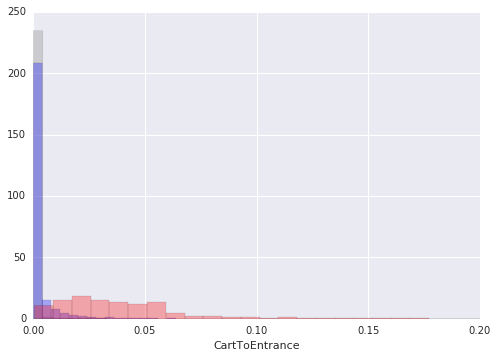

In [9]:
sns.distplot(dfcontrol["CartToEntrance"], kde=False, 
             rug=False, bins=50, norm_hist=True, hist_kws={"color":"gray", "alpha": 0.3})
sns.distplot(dfptnA["CartToEntrance"], kde=False, 
             rug=False, bins=50, norm_hist=True, hist_kws={"color":"blue", "alpha": 0.3})
sns.distplot(dfptnB["CartToEntrance"], kde=False, 
             rug=False, bins=50, norm_hist=True, hist_kws={"color":"red", "alpha": 0.3})
sns.plt.xlim(0,0.2)

(0, 0.1)

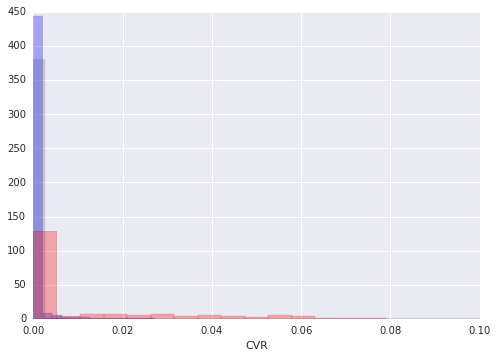

In [10]:
sns.distplot(dfcontrol["CVR"], kde=False, 
             rug=False, bins=50, norm_hist=True, hist_kws={"color":"gray", "alpha": 0.3})
sns.distplot(dfptnA["CVR"], kde=False, 
             rug=False, bins=50, norm_hist=True, hist_kws={"color":"blue", "alpha": 0.3})
sns.distplot(dfptnB["CVR"], kde=False, 
             rug=False, bins=50, norm_hist=True, hist_kws={"color":"red", "alpha": 0.3})
sns.plt.xlim(0,0.1)

(0, 0.2)

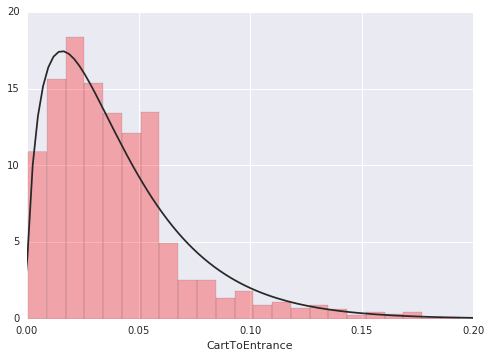

In [11]:
sns.distplot(dfptnB["CartToEntrance"], kde=False, 
             rug=False, bins=50, 
             fit=stats.chi2, norm_hist=True, hist_kws={"color":"red", "alpha": 0.3})
sns.plt.xlim(0,0.2)

(0, 0.1)

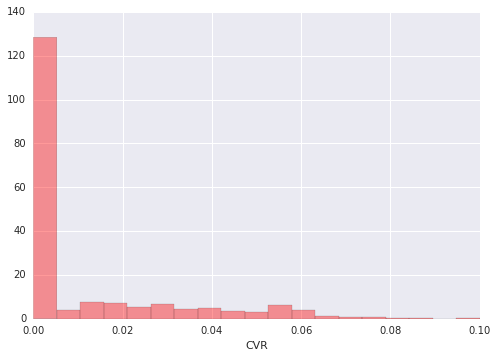

In [12]:
sns.distplot(dfptnB["CVR"], kde=False, rug=False, 
             bins=50, color="red", norm_hist=True)
sns.plt.xlim(0,0.1)

In [13]:
print("--- Control ---")
print(dfcontrol["addingCart"].sum(axis=0))
print(dfcontrol["purchases"].sum(axis=0))
print(dfcontrol["entrances"].sum(axis=0))
print("--- Control for A ---")
print(dfcontrolCategory["addingCart"].sum(axis=0))
print(dfcontrolCategory["purchases"].sum(axis=0))
print(dfcontrolCategory["entrances"].sum(axis=0))
print("--- pattern A ---")
print(dfptnA["addingCart"].sum(axis=0))
print(dfptnA["purchases"].sum(axis=0))
print(dfptnA["entrances"].sum(axis=0))
print("--- Control for B ---")
print(dfcontrolItem["addingCart"].sum(axis=0))
print(dfcontrolItem["purchases"].sum(axis=0))
print(dfcontrolItem["entrances"].sum(axis=0))
print("--- pattern B ---")
print(dfptnB["addingCart"].sum(axis=0))
print(dfptnB["purchases"].sum(axis=0))
print(dfptnB["entrances"].sum(axis=0))

--- Control ---
16156
5589
35369011
--- Control for A ---
14039
4516
19822932
--- pattern A ---
14039
4516
19822932
--- Control for B ---
4371
1278
265508
--- pattern B ---
4371
1278
265508
